## Classification
### Fahad Ahmed


In [550]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [551]:
df = pd.read_csv('CreditCardData.csv')

In [552]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## q1

In [553]:
df = df.replace("?", np.nan)
df = df.dropna()

## q2

In [554]:
df["Approved"] = df["Approved"].replace(["+", "-"], ["Yes", "No"])

### q3

In [555]:
df1 = pd.get_dummies(df, columns = ['ZipCode','Male','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'])

In [556]:
X = df1.drop(['Approved'],axis=1)
Y = df1['Approved']

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)


dt = tree.DecisionTreeClassifier(random_state=10)
dtmodel = dt.fit(X_train, y_train)

In [558]:
train_pred = dtmodel.predict(X_train)
acc = (accuracy_score(train_pred, y_train))*100
acc

100.0

In [559]:
test_pred = dtmodel.predict(X_test)
acc = (accuracy_score(test_pred, y_test))*100

acc

82.14285714285714

## We can see that the training data is 70% while the test data is 30%
### training accuracy is 100% and test accuracy is 82.1%
### there are lot of columns that are not affecting our prediction so we are facing the problem of overfitting

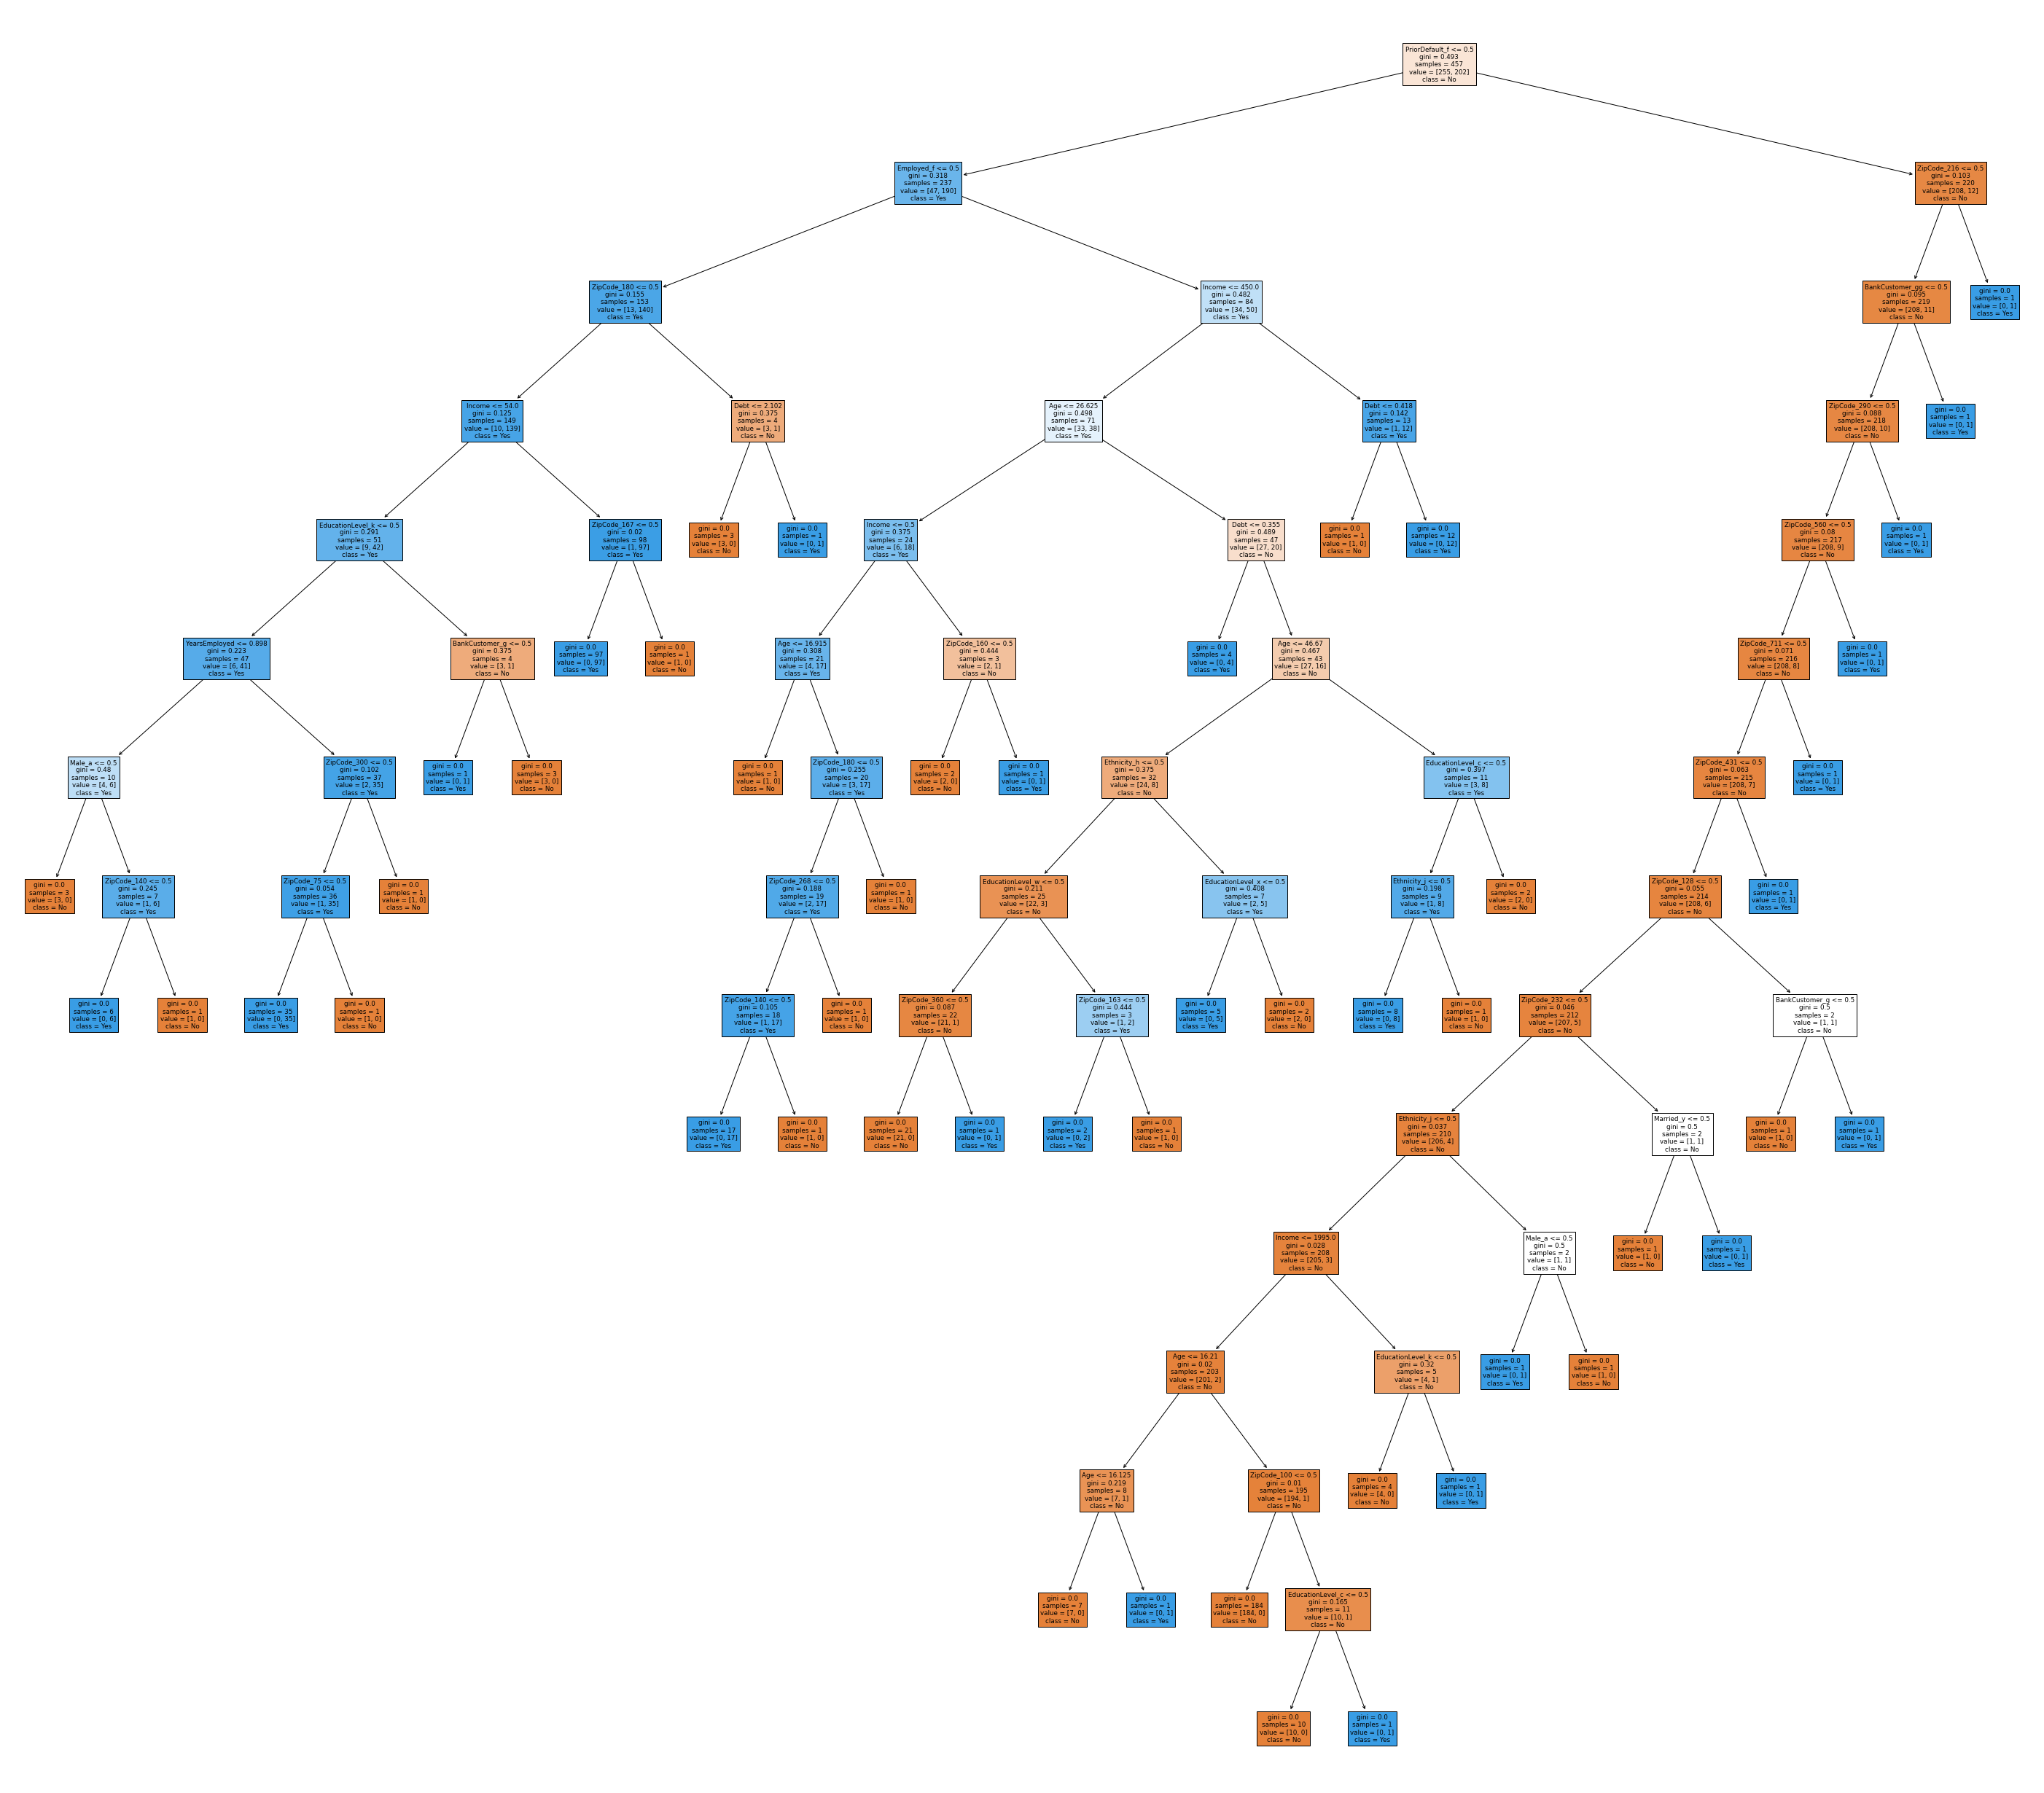

In [560]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=Y.value_counts().index,
                   filled=True)

### as we go down the tree we see the most insignificant attributes, as the root node is the most important column i.e., PriorDefault_f

## Pruning model

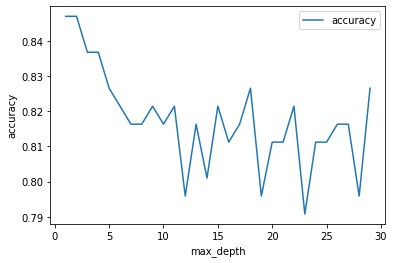

In [561]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})
plt.plot('max_depth','accuracy', data=d)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [562]:
dt = tree.DecisionTreeClassifier(criterion='gini',max_depth=4) 

In [563]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

90.15317286652079

In [564]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

84.18367346938776

### accuracy increases after pruning, and overfitting is reduced.

## random forest

#### N_Estimator = 80

In [565]:
rf = RandomForestClassifier(n_estimators=80)

In [566]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [567]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

### n_estimators = 80
### training accuracy = 100%
### testing accuracy = 86.24%.

### N_Estimator = 40

In [568]:
rf = RandomForestClassifier(n_estimators=40)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [569]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.20408163265306

### N_Estimator = 10

In [570]:
rf = RandomForestClassifier(n_estimators=20)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

99.78118161925602

In [571]:
test_pred1 = rfmodel.predict(X_test)
acc = accuracy_score(test_pred1, y_test)
acc*100

85.20408163265306

## the test prediction descreases as the estimators decrease.

Text(0.5, 0, 'Random Forest Feature Importance')

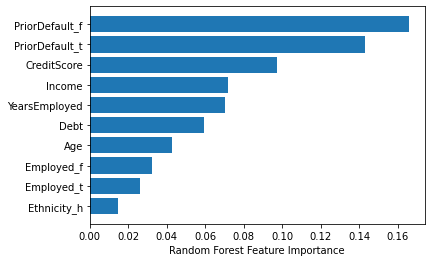

In [572]:
sorted_idx = rfmodel.feature_importances_.argsort()[-10:]
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### PriorDefault is most significant attribute in the graph as seen.

## Comparison between Decision Tree and RandomFores

### Decision Tree:

In [573]:
score = cross_val_score(dtmodel, X, Y, cv= 5)
score.mean()

0.8330475631238989

### Random forest tree

In [574]:
score = cross_val_score(rfmodel, X,Y,cv=5)
score.mean()

0.8560187903699354

### The accuracy percentage of random forest is better than decision tree hence the random forest model is better than decision tree in terms of accuracy.

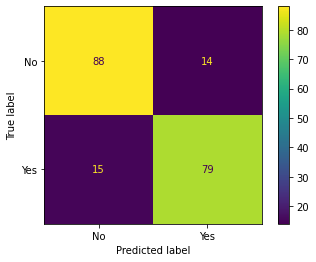

In [575]:
cm2 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm2,display_labels=dtmodel.classes_)
cp.plot()

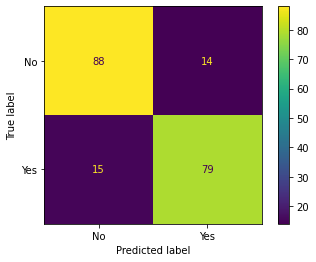

In [576]:
cm2 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

### Random forest trees have more correct predictions than decision trees and are hence, better.

## Last part: mcdonald

In [577]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw9/mcdonalds.csv')

In [578]:
X = df.drop(['restaurant', 'item'], axis=1)
Y = df['item']

In [579]:
dt = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=10)

In [580]:
dt = dt.fit(X, Y)

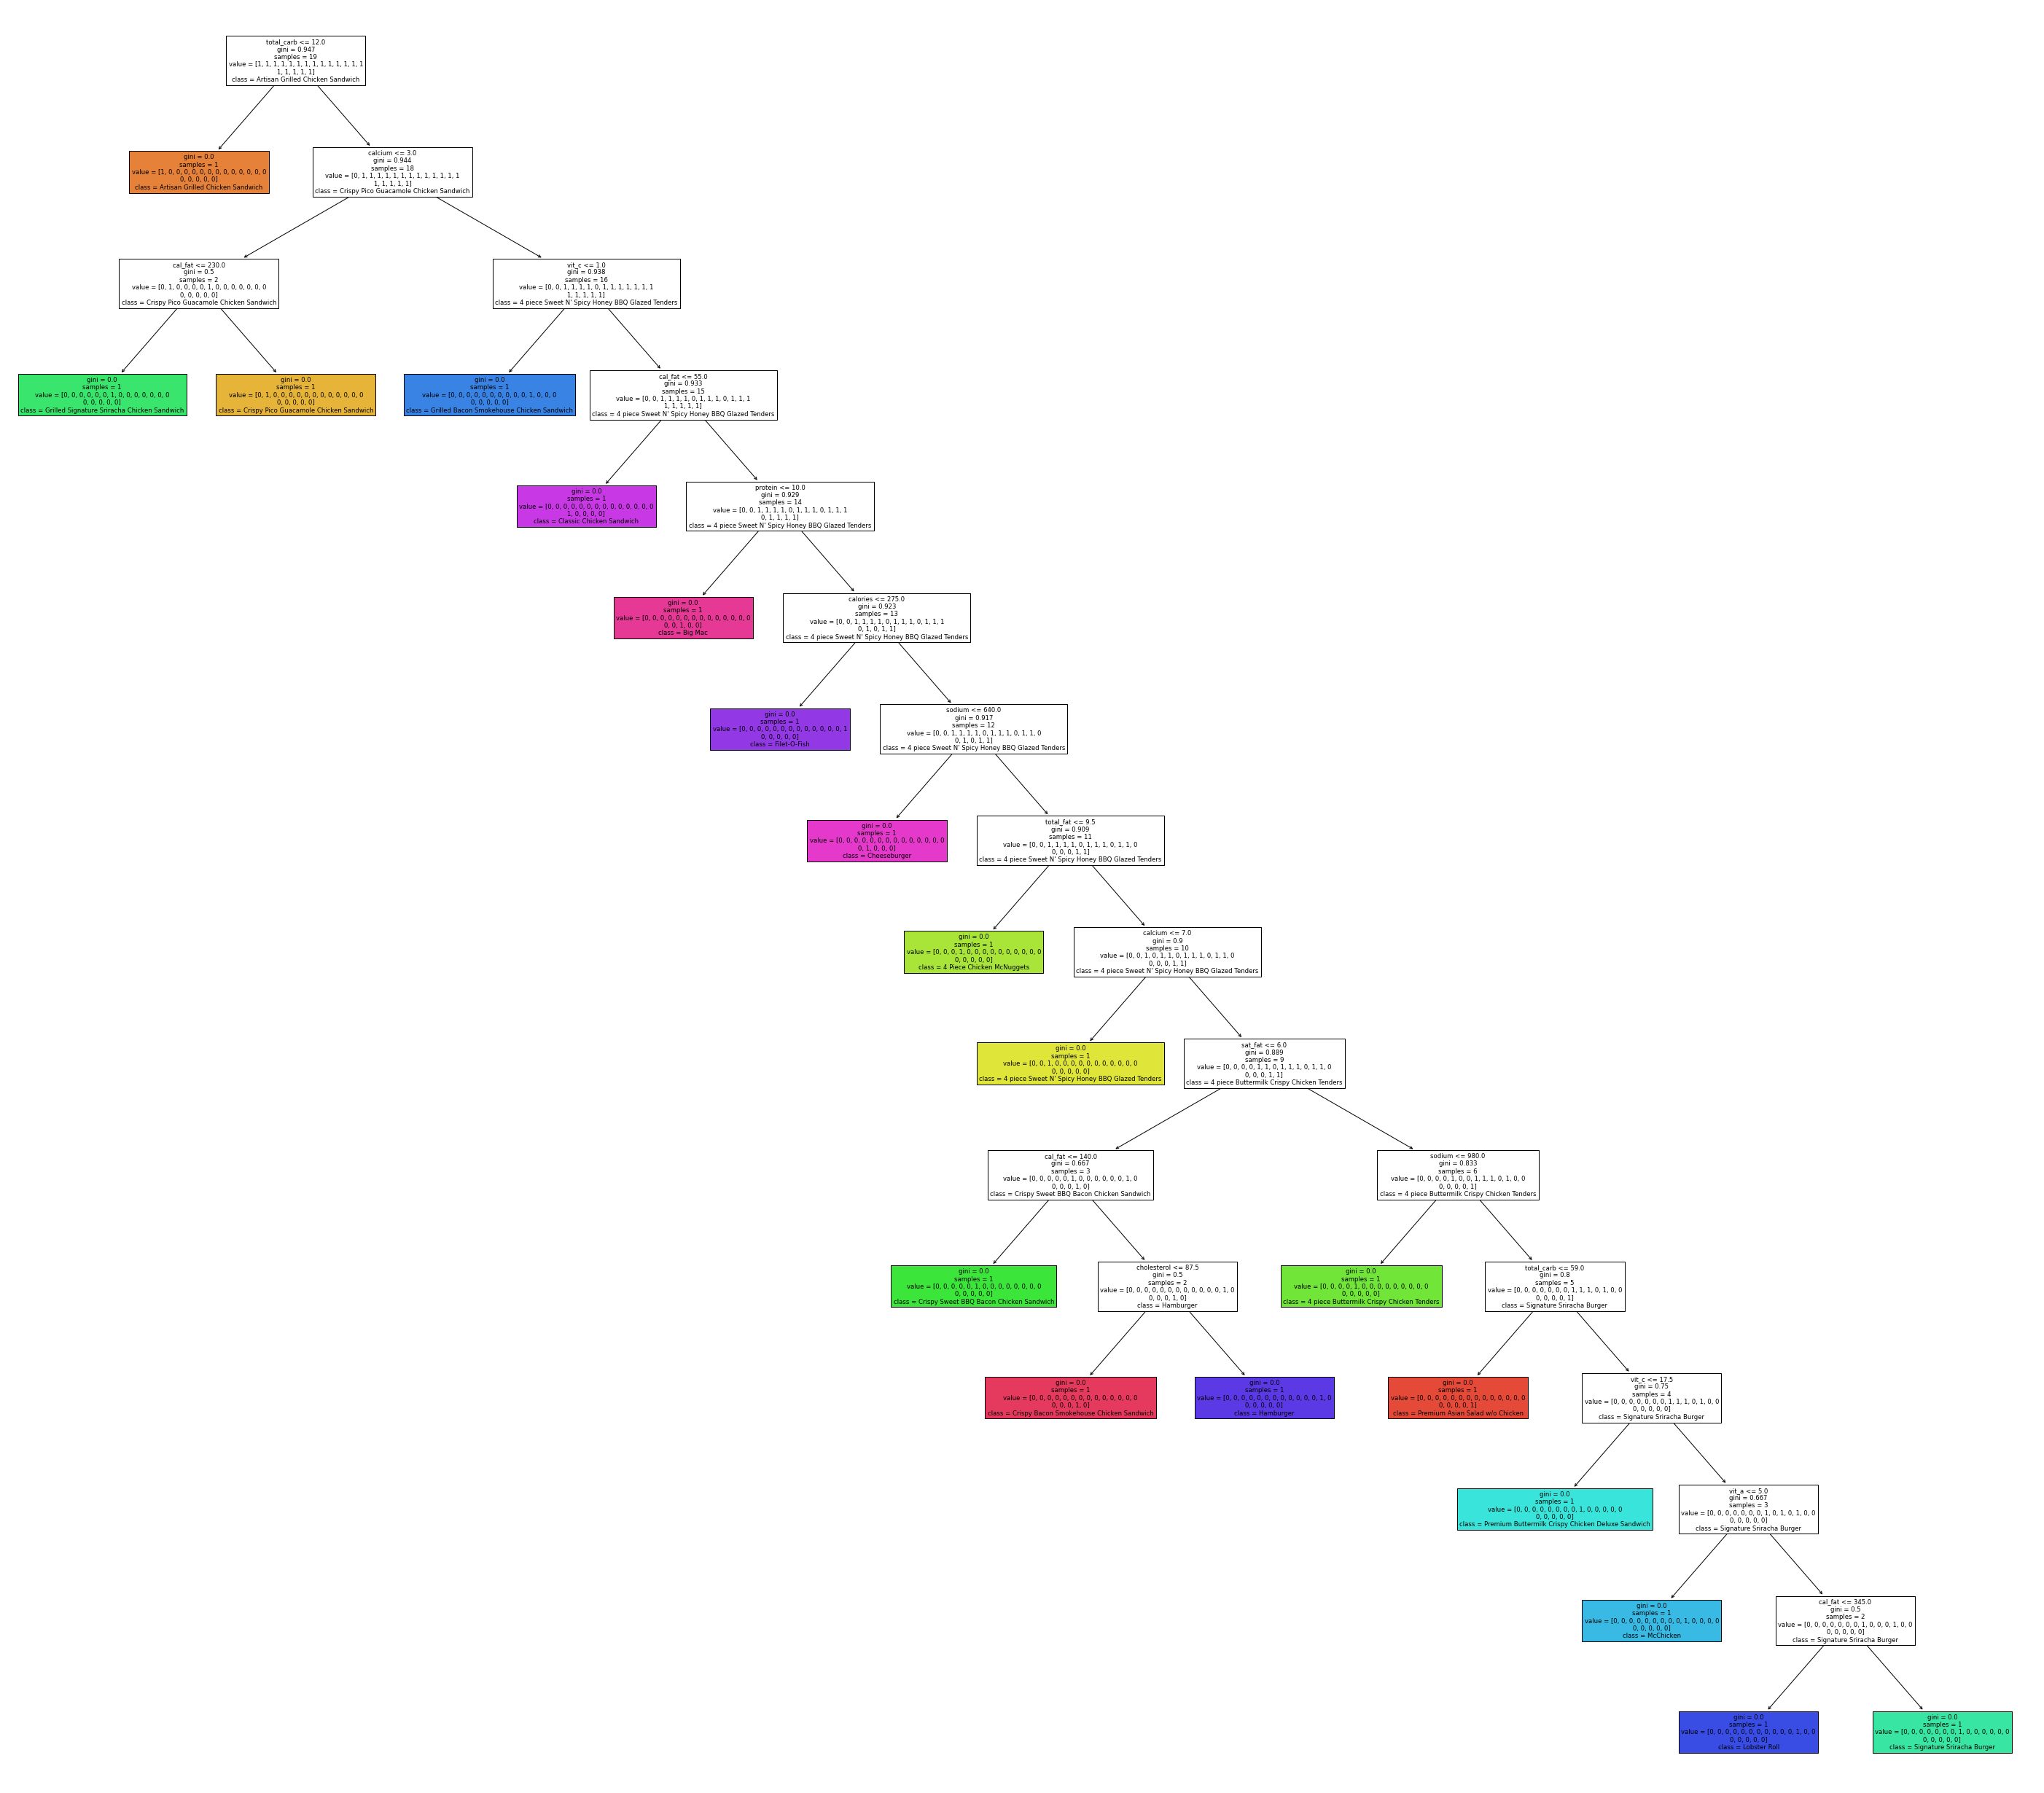

In [581]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dt,  feature_names=list(X.columns),  class_names=Y.value_counts().index,  filled=True)

### most important column = root node = total_crab
### the least significant are branch attributes like lobstar roll.